## sequence 가지고 오기
- uniprot에 접속 한다.
- http://www.uniprot.org/
- 검색창에 UniProtKB 에서 Q9CD83 이나 A0PQ23 을 친다
- Format 에서 fasta를 선택해서 내려받는다

In [1]:
library("seqinr")
leprae <- read.fasta(file = "Q9CD83.fasta")
ulcerans <- read.fasta(file = "A0PQ23.fasta")
lepraeseq <- leprae[[1]]
ulceransseq <- ulcerans[[1]]
lepraeseq 

  [1] "m" "t" "n" "r" "t" "l" "s" "r" "e" "e" "i" "r" "k" "l" "d" "r" "d" "l"
 [19] "r" "i" "l" "v" "a" "t" "n" "g" "t" "l" "t" "r" "v" "l" "n" "v" "v" "a"
 [37] "n" "e" "e" "i" "v" "v" "d" "i" "i" "n" "q" "q" "l" "l" "d" "v" "a" "p"
 [55] "k" "i" "p" "e" "l" "e" "n" "l" "k" "i" "g" "r" "i" "l" "q" "r" "d" "i"
 [73] "l" "l" "k" "g" "q" "k" "s" "g" "i" "l" "f" "v" "a" "a" "e" "s" "l" "i"
 [91] "v" "i" "d" "l" "l" "p" "t" "a" "i" "t" "t" "y" "l" "t" "k" "t" "h" "h"
[109] "p" "i" "g" "e" "i" "m" "a" "a" "s" "r" "i" "e" "t" "y" "k" "e" "d" "a"
[127] "q" "v" "w" "i" "g" "d" "l" "p" "c" "w" "l" "a" "d" "y" "g" "y" "w" "d"
[145] "l" "p" "k" "r" "a" "v" "g" "r" "r" "y" "r" "i" "i" "a" "g" "g" "q" "p"
[163] "v" "i" "i" "t" "t" "e" "y" "f" "l" "r" "s" "v" "f" "q" "d" "t" "p" "r"
[181] "e" "e" "l" "d" "r" "c" "q" "y" "s" "n" "d" "i" "d" "t" "r" "s" "g" "d"
[199] "r" "f" "v" "l" "h" "g" "r" "v" "f" "k" "n" "l"
attr(,"name")
[1] "sp|Q9CD83|PHBS_MYCLE"
attr(,"Annot")
[1] ">sp|Q9CD83|PHBS_MYCLE Chori

In [2]:
attributes(lepraeseq)

$name
[1] "sp|Q9CD83|PHBS_MYCLE"

$Annot
[1] ">sp|Q9CD83|PHBS_MYCLE Chorismate pyruvate-lyase OS=Mycobacterium leprae (strain TN) GN=ML0133 PE=3 SV=1"

$class
[1] "SeqFastadna"

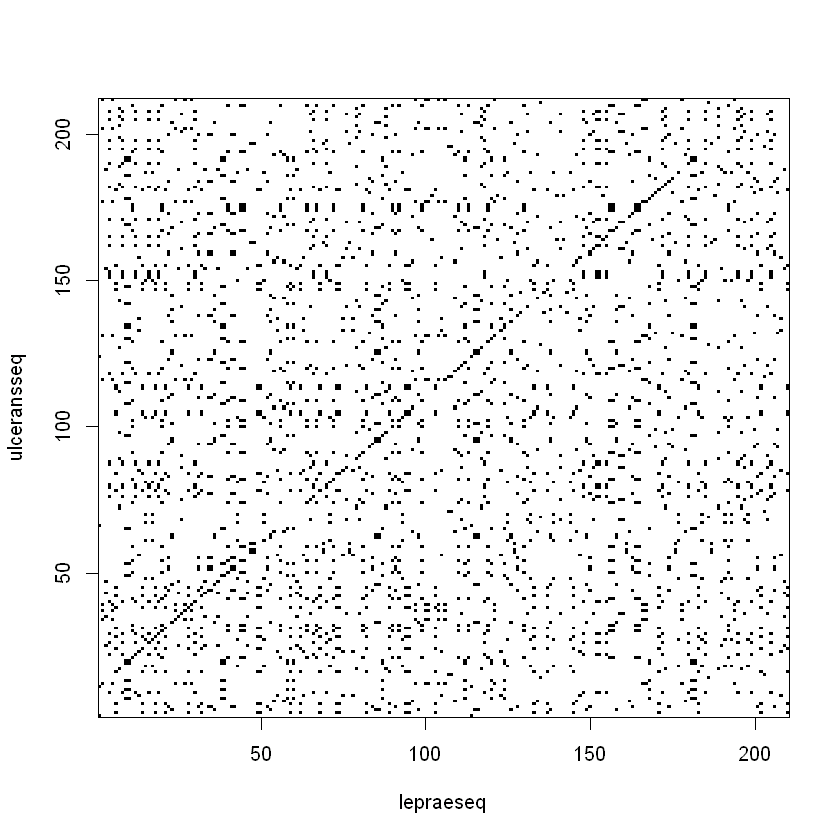

In [34]:
dotPlot(lepraeseq, ulceransseq)

## pairewise alignment
bioconductor의 Biostrings 라이브러리를 이용하여 pairewise alignment

* 우선 bioconductor 설치:
[연결](https://a-little-book-of-r-for-bioinformatics.readthedocs.io/en/latest/src/installr.html#how-to-install-a-bioconductor-r-package)

````R
> source("http://bioconductor.org/biocLite.R")
> biocLite("Biostrings")
````

* 가장 기본적인 Needleman-Wunsch algorithm: [위키페디아](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm)

### 우선 시작

In [29]:
library(Biostrings)
sigma <- nucleotideSubstitutionMatrix(match = 2, mismatch = -1, baseOnly = TRUE)
sigma 

,A,C,G,T
A,2,-1,-1,-1
C,-1,2,-1,-1
G,-1,-1,2,-1
T,-1,-1,-1,2


In [30]:
s1 <- "GAATTC"
s2 <- "GATTA"
globalAligns1s2 <- pairwiseAlignment(s1, s2, substitutionMatrix = sigma, gapOpening = -2, gapExtension = -8, scoreOnly = FALSE)
globalAligns1s2

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [1] GAATTC 
subject: [1] GA-TTA 
score: -3 

### protein 의 pairewise alignment

In [31]:
data(BLOSUM50)
BLOSUM50

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,5,-2,-1,-2,-1,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,-1,-5
R,-2,7,-1,-2,-4,1,0,-3,0,-4,...,-3,-1,-1,-3,-1,-3,-1,0,-1,-5
N,-1,-1,7,2,-2,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,4,0,-1,-5
D,-2,-2,2,8,-4,0,2,-1,-1,-4,...,-1,0,-1,-5,-3,-4,5,1,-1,-5
C,-1,-4,-2,-4,13,-3,-3,-3,-3,-2,...,-4,-1,-1,-5,-3,-1,-3,-3,-2,-5
Q,-1,1,0,0,-3,7,2,-2,1,-3,...,-1,0,-1,-1,-1,-3,0,4,-1,-5
E,-1,0,0,2,-3,2,6,-3,0,-4,...,-1,-1,-1,-3,-2,-3,1,5,-1,-5
G,0,-3,0,-1,-3,-2,-3,8,-2,-4,...,-2,0,-2,-3,-3,-4,-1,-2,-2,-5
H,-2,0,1,-1,-3,1,0,-2,10,-4,...,-2,-1,-2,-3,2,-4,0,0,-1,-5
I,-1,-4,-3,-4,-2,-3,-4,-4,-4,5,...,-3,-3,-1,-3,-1,4,-4,-3,-1,-5


In [35]:
data(package="Biostrings")

,Package,Item,Title
1,Biostrings,BLOSUM100,Scoring matrices
2,Biostrings,BLOSUM45,Scoring matrices
3,Biostrings,BLOSUM50,Scoring matrices
4,Biostrings,BLOSUM62,Scoring matrices
5,Biostrings,BLOSUM80,Scoring matrices
6,Biostrings,HNF4alpha,Known HNF4alpha binding sequences
7,Biostrings,PAM120,Scoring matrices
8,Biostrings,PAM250,Scoring matrices
9,Biostrings,PAM30,Scoring matrices
10,Biostrings,PAM40,Scoring matrices


### Needleman-Wunsch algorithm 를 이용한 global alignment

In [37]:
data(BLOSUM50)
s3 <- "PAWHEAE"
s4 <- "HEAGAWGHEE"
globalAligns3s4 <- pairwiseAlignment(s3, s4, substitutionMatrix = "BLOSUM50", gapOpening = -2, gapExtension = -8, scoreOnly = FALSE)
globalAligns3s4

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [1] P---AWHEAE 
subject: [1] HEAGAWGHEE 
score: -5 

### 앞의 예 leprae 와 ulcerans 를 이용한 pairwise sequence alignment

In [38]:
leprae

$`sp|Q9CD83|PHBS_MYCLE`
  [1] "m" "t" "n" "r" "t" "l" "s" "r" "e" "e" "i" "r" "k" "l" "d" "r" "d" "l"
 [19] "r" "i" "l" "v" "a" "t" "n" "g" "t" "l" "t" "r" "v" "l" "n" "v" "v" "a"
 [37] "n" "e" "e" "i" "v" "v" "d" "i" "i" "n" "q" "q" "l" "l" "d" "v" "a" "p"
 [55] "k" "i" "p" "e" "l" "e" "n" "l" "k" "i" "g" "r" "i" "l" "q" "r" "d" "i"
 [73] "l" "l" "k" "g" "q" "k" "s" "g" "i" "l" "f" "v" "a" "a" "e" "s" "l" "i"
 [91] "v" "i" "d" "l" "l" "p" "t" "a" "i" "t" "t" "y" "l" "t" "k" "t" "h" "h"
[109] "p" "i" "g" "e" "i" "m" "a" "a" "s" "r" "i" "e" "t" "y" "k" "e" "d" "a"
[127] "q" "v" "w" "i" "g" "d" "l" "p" "c" "w" "l" "a" "d" "y" "g" "y" "w" "d"
[145] "l" "p" "k" "r" "a" "v" "g" "r" "r" "y" "r" "i" "i" "a" "g" "g" "q" "p"
[163] "v" "i" "i" "t" "t" "e" "y" "f" "l" "r" "s" "v" "f" "q" "d" "t" "p" "r"
[181] "e" "e" "l" "d" "r" "c" "q" "y" "s" "n" "d" "i" "d" "t" "r" "s" "g" "d"
[199] "r" "f" "v" "l" "h" "g" "r" "v" "f" "k" "n" "l"
attr(,"name")
[1] "sp|Q9CD83|PHBS_MYCLE"
attr(,"Annot")
[1] ">sp

In [40]:
ulcerans

$`tr|A0PQ23|A0PQ23_MYCUA`
  [1] "m" "l" "a" "v" "l" "p" "e" "k" "r" "e" "m" "t" "e" "c" "h" "l" "s" "d"
 [19] "e" "e" "i" "r" "k" "l" "n" "r" "d" "l" "r" "i" "l" "i" "a" "t" "n" "g"
 [37] "t" "l" "t" "r" "i" "l" "n" "v" "l" "a" "n" "d" "e" "i" "v" "v" "e" "i"
 [55] "v" "k" "q" "q" "i" "q" "d" "a" "a" "p" "e" "m" "d" "g" "c" "d" "h" "s"
 [73] "s" "i" "g" "r" "v" "l" "r" "r" "d" "i" "v" "l" "k" "g" "r" "r" "s" "g"
 [91] "i" "p" "f" "v" "a" "a" "e" "s" "f" "i" "a" "i" "d" "l" "l" "p" "p" "e"
[109] "i" "v" "a" "s" "l" "l" "e" "t" "h" "r" "p" "i" "g" "e" "v" "m" "a" "a"
[127] "s" "c" "i" "e" "t" "f" "k" "e" "e" "a" "k" "v" "w" "a" "g" "e" "s" "p"
[145] "a" "w" "l" "e" "l" "d" "r" "r" "r" "n" "l" "p" "p" "k" "v" "v" "g" "r"
[163] "q" "y" "r" "v" "i" "a" "e" "g" "r" "p" "v" "i" "i" "i" "t" "e" "y" "f"
[181] "l" "r" "s" "v" "f" "e" "d" "n" "s" "r" "e" "e" "p" "i" "r" "h" "q" "r"
[199] "s" "v" "g" "t" "s" "a" "r" "s" "g" "r" "s" "i" "c" "t"
attr(,"name")
[1] "tr|A0PQ23|A0PQ23_MYCUA"
attr(,"Anno

In [41]:
lepraeseqstring <- c2s(lepraeseq)    
ulceransseqstring <- c2s(ulceransseq)
lepraeseqstring <- toupper(lepraeseqstring)
ulceransseqstring <- toupper(ulceransseqstring)
lepraeseqstring
globalAlignLepraeUlcerans <- pairwiseAlignment(lepraeseqstring, ulceransseqstring,substitutionMatrix = BLOSUM50, gapOpening = -2, gapExtension = -8, scoreOnly = FALSE)
globalAlignLepraeUlcerans 

[1] "MTNRTLSREEIRKLDRDLRILVATNGTLTRVLNVVANEEIVVDIINQQLLDVAPKIPELENLKIGRILQRDILLKGQKSGILFVAAESLIVIDLLPTAITTYLTKTHHPIGEIMAASRIETYKEDAQVWIGDLPCWLADYGYWDLPKRAVGRRYRIIAGGQPVIITTEYFLRSVFQDTPREELDRCQYSNDIDTRSGDRFVLHGRVFKNL"

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [1] MT-----NR--T---LSREEIRKLDRDLRILVATN...QDTPREELDRCQYSNDIDTRSGDRFVLHGRVFKN 
subject: [1] MLAVLPEKREMTECHLSDEEIRKLNRDLRILIATN...EDNSREEPIRHQRS--VGT-SA-R---SGRSICT 
score: 627 

### 긴 서열 정렬 결과를 보자

In [42]:
printPairwiseAlignment <- function(alignment, chunksize=60, returnlist=FALSE)
  {
     require(Biostrings)          
     seq1aln <- pattern(alignment)
     seq2aln <- subject(alignment)
     alnlen  <- nchar(seq1aln)    
     starts  <- seq(1, alnlen, by=chunksize)
     n       <- length(starts)
     seq1alnresidues <- 0
     seq2alnresidues <- 0
     for (i in 1:n) {
        chunkseq1aln <- substring(seq1aln, starts[i], starts[i]+chunksize-1)
        chunkseq2aln <- substring(seq2aln, starts[i], starts[i]+chunksize-1)
        
        gaps1 <- countPattern("-",chunkseq1aln) # countPattern() is from Biostrings package
        
        gaps2 <- countPattern("-",chunkseq2aln) # countPattern() is from Biostrings package
        
        seq1alnresidues <- seq1alnresidues + chunksize - gaps1
        
        seq2alnresidues <- seq2alnresidues + chunksize - gaps2
        if (returnlist == 'FALSE')
        {
           print(paste(chunkseq1aln,seq1alnresidues))
           print(paste(chunkseq2aln,seq2alnresidues))
           print(paste(' '))
        }
     }
     if (returnlist == 'TRUE')
     {
        vector1 <- s2c(substring(seq1aln, 1, nchar(seq1aln)))
        vector2 <- s2c(substring(seq2aln, 1, nchar(seq2aln)))
        mylist <- list(vector1, vector2)
        return(mylist)
     }
}

In [43]:
printPairwiseAlignment(globalAlignLepraeUlcerans,60)

[1] "MT-----NR--T---LSREEIRKLDRDLRILVATNGTLTRVLNVVANEEIVVDIINQQLL 50"
[1] "MLAVLPEKREMTECHLSDEEIRKLNRDLRILIATNGTLTRILNVLANDEIVVEIVKQQIQ 60"
[1] " "
[1] "DVAPKIPELENLKIGRILQRDILLKGQKSGILFVAAESLIVIDLLPTAITTYLTKTHHPI 110"
[1] "DAAPEMDGCDHSSIGRVLRRDIVLKGRRSGIPFVAAESFIAIDLLPPEIVASLLETHRPI 120"
[1] " "
[1] "GEIMAASRIETYKEDAQVWIGDLPCWLADYGYWDLPKRAVGRRYRIIAGGQPVIITTEYF 170"
[1] "GEVMAASCIETFKEEAKVWAGESPAWLELDRRRNLPPKVVGRQYRVIAEGRPVIIITEYF 180"
[1] " "
[1] "LRSVFQDTPREELDRCQYSNDIDTRSGDRFVLHGRVFKN 230"
[1] "LRSVFEDNSREEPIRHQRS--VGT-SA-R---SGRSICT 233"
[1] " "


### Smith-Waterman algorithm을 이용한 local alignment
두 개의 sequence 에서 가장 잘 정렬 되는 부분을 찾는 방법 

[위키페디아](https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm)


In [45]:
localAlignLepraeUlcerans <- pairwiseAlignment(lepraeseqstring, ulceransseqstring,substitutionMatrix = BLOSUM50, gapOpening = -2, gapExtension = -8, scoreOnly = FALSE, type="local")
localAlignLepraeUlcerans 
printPairwiseAlignment(localAlignLepraeUlcerans, 60)

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern:  [1] MTNRTLSREEIRKLDRDLRILVATNGTLTRVLNVV...IITTEYFLRSVFQDTPREELDRCQYSNDIDTRSG 
subject: [11] MTECHLSDEEIRKLNRDLRILIATNGTLTRILNVL...IIITEYFLRSVFEDNSREEPIRHQRSVGTSARSG 
score: 761 

[1] "MTNRTLSREEIRKLDRDLRILVATNGTLTRVLNVVANEEIVVDIINQQLLDVAPKIPELE 60"
[1] "MTECHLSDEEIRKLNRDLRILIATNGTLTRILNVLANDEIVVEIVKQQIQDAAPEMDGCD 60"
[1] " "
[1] "NLKIGRILQRDILLKGQKSGILFVAAESLIVIDLLPTAITTYLTKTHHPIGEIMAASRIE 120"
[1] "HSSIGRVLRRDIVLKGRRSGIPFVAAESFIAIDLLPPEIVASLLETHRPIGEVMAASCIE 120"
[1] " "
[1] "TYKEDAQVWIGDLPCWLADYGYWDLPKRAVGRRYRIIAGGQPVIITTEYFLRSVFQDTPR 180"
[1] "TFKEEAKVWAGESPAWLELDRRRNLPPKVVGRQYRVIAEGRPVIIITEYFLRSVFEDNSR 180"
[1] " "
[1] "EELDRCQYSNDIDTRSG 240"
[1] "EEPIRHQRSVGTSARSG 240"
[1] " "


### alignment score에 대한 통계적 significance 계산
같은 길이의 random 서열을 만들고 이에 비해 얼마나 의미 있는지 확인


In [46]:
generateSeqsWithMultinomialModel <- function(inputsequence, X)
  {
    
     require("seqinr")
     inputsequencevector <- s2c(inputsequence)
     
     mylength <- length(inputsequencevector)
     mytable <- table(inputsequencevector)
     
     letters <- rownames(mytable)
     numletters <- length(letters)
     probabilities <- numeric() # Make a vector to store the probabilities of letters
     for (i in 1:numletters)
     {
        letter <- letters[i]
        count <- mytable[[i]]
        probabilities[i] <- count/mylength
     }
     
     seqs <- numeric(X)
     for (j in 1:X)
     {
        seq <- sample(letters, mylength, rep=TRUE, prob=probabilities) # Sample with replacement
        seq <- c2s(seq)
        seqs[j] <- seq
     }
     
     return(seqs)
  }

In [47]:
randomseqs <- generateSeqsWithMultinomialModel('PAWHEAE',1000)
randomseqs[1:10] 

[1] "EPWWWAA" "EEAAWEE" "EHHEPEW" "EAWPPEE" "EWPPPWA" "EAAPEEE" "WAHPPHH"
 [8] "AAAAAHA" "HWPPWAA" "HEEWEHE"

In [49]:
s4 <- "HEAGAWGHEE"
pairwiseAlignment(s4, randomseqs[1], substitutionMatrix = "BLOSUM50", gapOpening = -2, gapExtension = -8, scoreOnly = FALSE)
pairwiseAlignment(s4, randomseqs[1], substitutionMatrix = "BLOSUM50", gapOpening = -2, gapExtension = -8, scoreOnly = TRUE)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [2] EAGAWGHEE 
subject: [1] EPWWWA--A 
score: -15 

[1] -15

In [4]:
randomscores <- double(1000)
for (i in 1:1000)
  {
     score <- pairwiseAlignment(s4, randomseqs[i], substitutionMatrix = "BLOSUM50",
       gapOpening = -2, gapExtension = -8, scoreOnly = TRUE)
     randomscores[i] <- score
  }

ERROR: Error: could not find function "pairwiseAlignment"


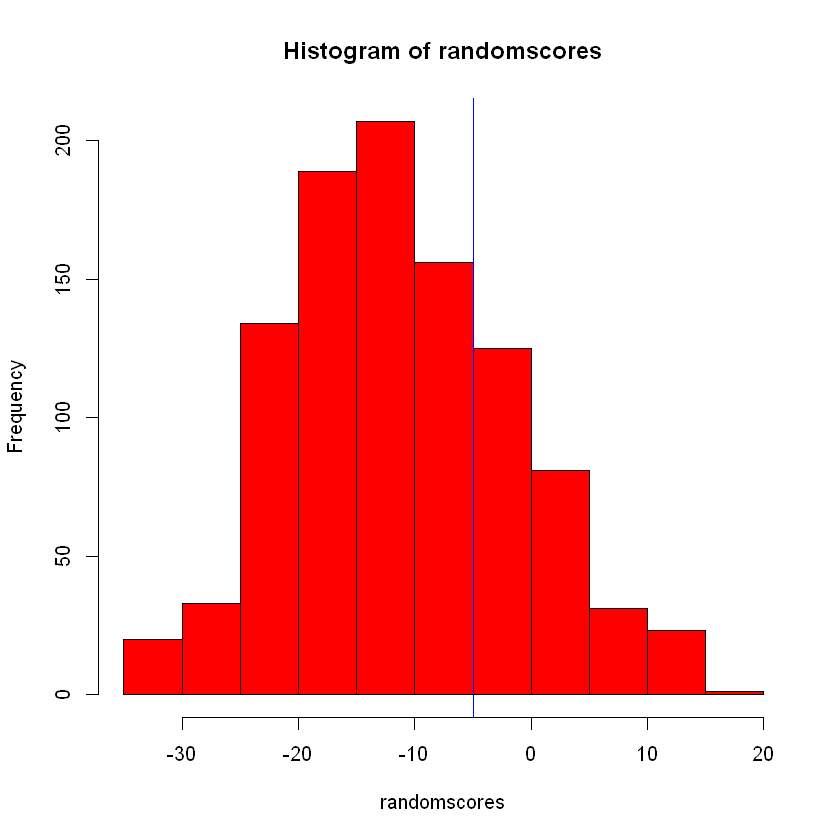

In [69]:
hist(randomscores, col="red")
abline(v=-5,col='blue')

In [60]:
head(randomscores)

[1] -15  15 -23   6 -18  -4

In [58]:
sum(randomscores >= -5)

[1] 286

In [62]:
pvalue <- sum(randomscores >= -5) / length(randomscores)
pvalue

[1] 0.286

In [3]:
mu <- mean(randomscores)
sigma <- sd(randomscores)
print()
zscore <- (-5-mu)/sigma
zscore
pnorm(zscore,mean=mu,sd=sigma)

ERROR: Error in mean(randomscores): object 'randomscores' not found
